# Why PCA ?

In [1]:
!wget -q https://github.com/DM-GY-9103-2024F-H/9103-utils/raw/main/src/data_utils.py

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

from data_utils import PCA, StandardScaler, object_from_json_url

### Get Data

In [3]:
PENGUIN_URL = "https://raw.githubusercontent.com/DM-GY-9103-2024F-H/9103-utils/refs/heads/main/datasets/json/penguins.json"
penguin_data = object_from_json_url(PENGUIN_URL)

penguins_df = pd.DataFrame.from_records(penguin_data)
penguins_df

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,39.1,18.7,181.0,3750.0,1
1,Adelie,39.5,17.4,186.0,3800.0,0
2,Adelie,40.3,18.0,195.0,3250.0,0
3,Adelie,36.7,19.3,193.0,3450.0,0
4,Adelie,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...
328,Chinstrap,55.8,19.8,207.0,4000.0,1
329,Chinstrap,43.5,18.1,202.0,3400.0,0
330,Chinstrap,49.6,18.2,193.0,3775.0,1
331,Chinstrap,50.8,19.0,210.0,4100.0,1


### Penguin Example

Explore the penguin data.

Let's encode the species column into integers.
It's a simple encoding, so we can just do it manually using a function and the `DataFrame.apply()` command.

In [4]:
species = list(penguins_df["species"].unique())

def species_to_label(s):
  return species.index(s)

penguins_df["label"] = penguins_df["species"].apply(species_to_label)

penguins_df

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,label
0,Adelie,39.1,18.7,181.0,3750.0,1,0
1,Adelie,39.5,17.4,186.0,3800.0,0,0
2,Adelie,40.3,18.0,195.0,3250.0,0,0
3,Adelie,36.7,19.3,193.0,3450.0,0,0
4,Adelie,39.3,20.6,190.0,3650.0,1,0
...,...,...,...,...,...,...,...
328,Chinstrap,55.8,19.8,207.0,4000.0,1,2
329,Chinstrap,43.5,18.1,202.0,3400.0,0,2
330,Chinstrap,49.6,18.2,193.0,3775.0,1,2
331,Chinstrap,50.8,19.0,210.0,4100.0,1,2


### Scale

In [6]:
# TODO: Scale data

penguin_scaler = StandardScaler()

penguins_feat_df = penguins_df.drop(columns=["species", "sex", "label"])
penguins_scaled_df = penguin_scaler.fit_transform(penguins_feat_df)

penguins_scaled_df["sex"] = penguins_df["sex"]

penguins_scaled_df

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,-0.896042,0.780732,-1.426752,-0.568475,1
1,-0.822788,0.119584,-1.069474,-0.506286,0
2,-0.676280,0.424729,-0.426373,-1.190361,0
3,-1.335566,1.085877,-0.569284,-0.941606,0
4,-0.859415,1.747026,-0.783651,-0.692852,1
...,...,...,...,...,...
328,2.162314,1.340165,0.431094,-0.257532,1
329,-0.090248,0.475587,0.073816,-1.003795,0
330,1.026876,0.526444,-0.569284,-0.537380,1
331,1.246638,0.933305,0.645461,-0.133155,1


### Covariances

If we're trying to get some insight into our data, we can look at covariance tables and some plots.

Now that we have scaled data we can look at covariance tables.

In [7]:
# TODO: Look at covariances
penguins_scaled_df.cov()

# TODO: Get 2 or 3 most related features with idxmax()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
bill_length_mm,1.003012,-0.229314,0.655063,0.591227,0.172550
bill_depth_mm,-0.229314,1.003012,-0.579532,-0.473437,0.186890
flipper_length_mm,0.655063,-0.579532,1.003012,0.875608,0.127964
body_mass_g,0.591227,-0.473437,0.875608,1.003012,0.213125
sex,0.172550,0.186890,0.127964,0.213125,0.250733


### Separate Features

In [8]:
# TODO: Separate features from the scaled full DataFrame

penguins_features_df = penguins_scaled_df

### Plot the Data

We can look at plots of the most correlated features, and of all of the possible pairs of features.

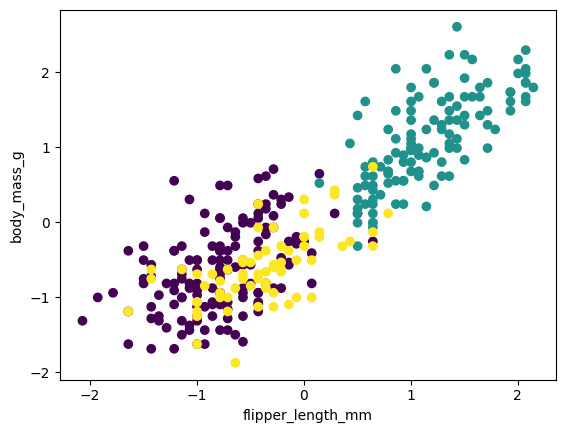

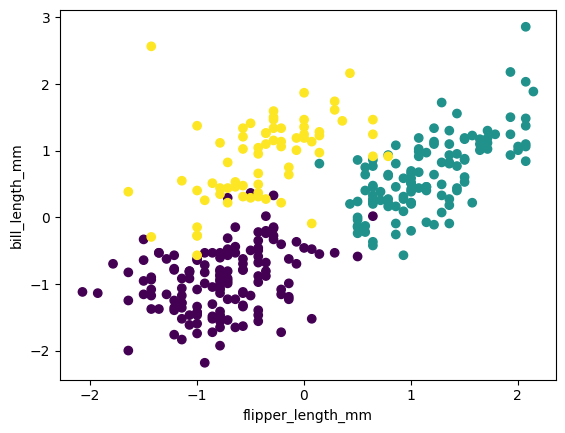

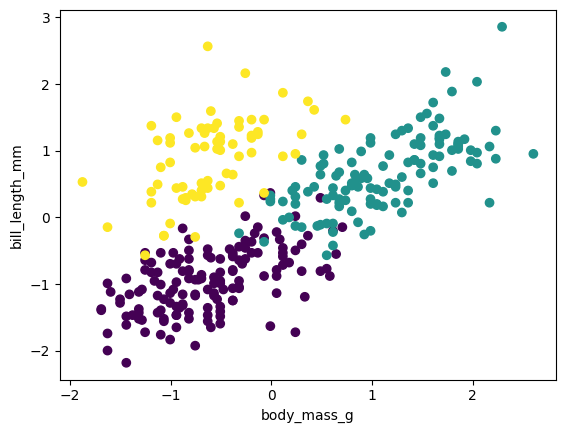

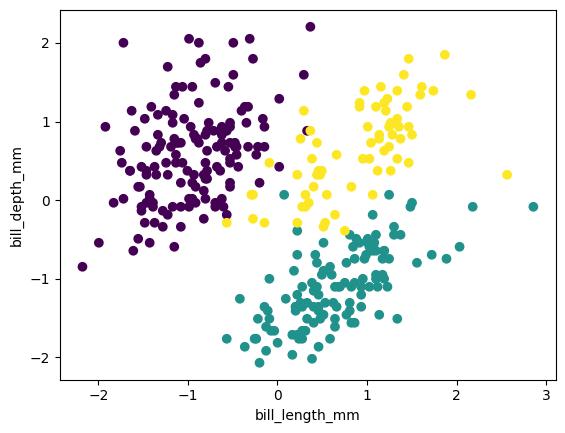

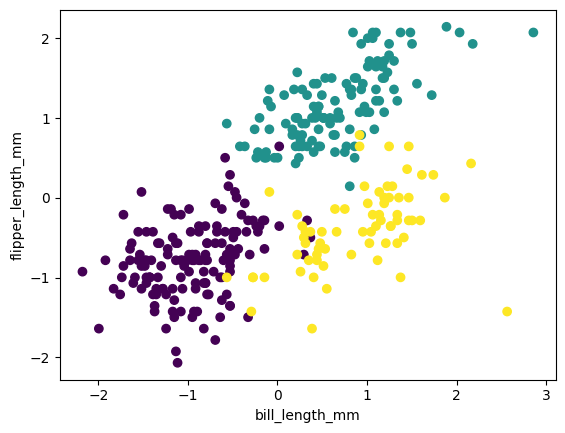

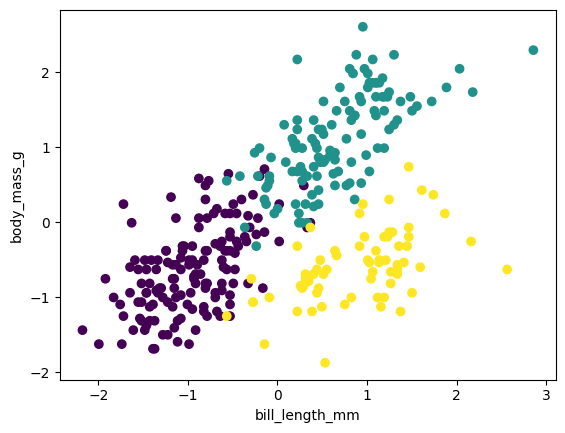

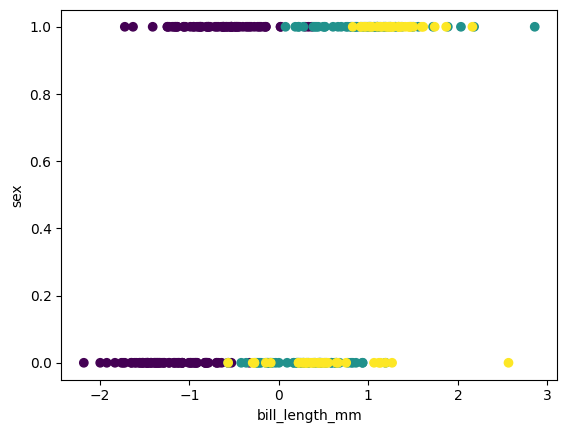

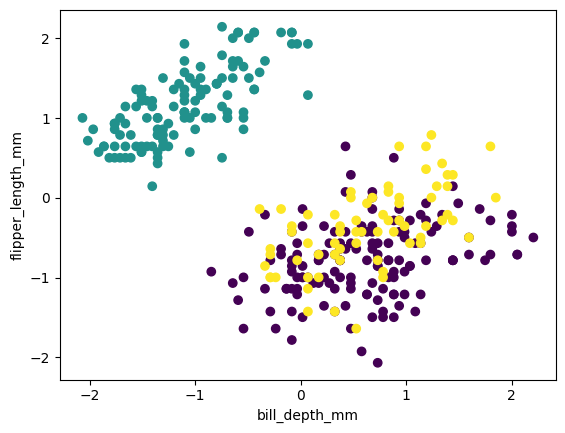

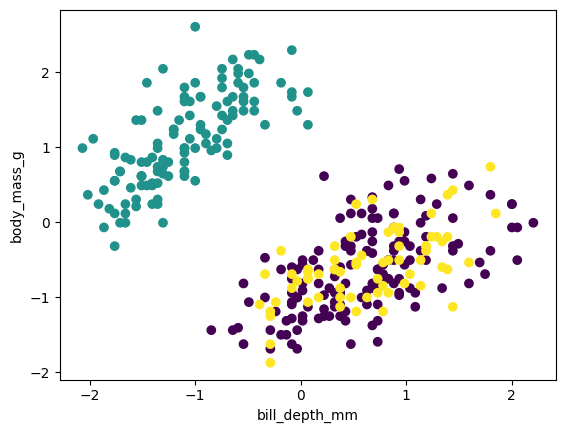

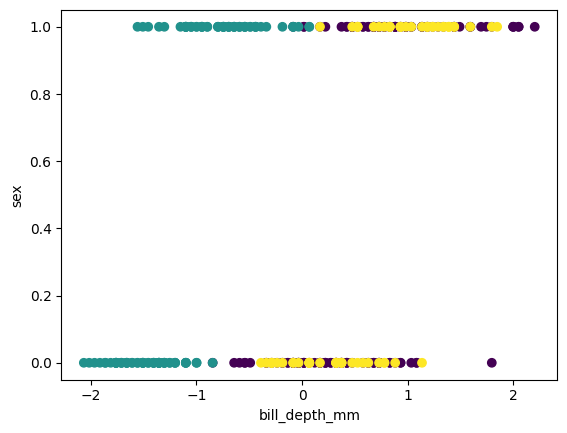

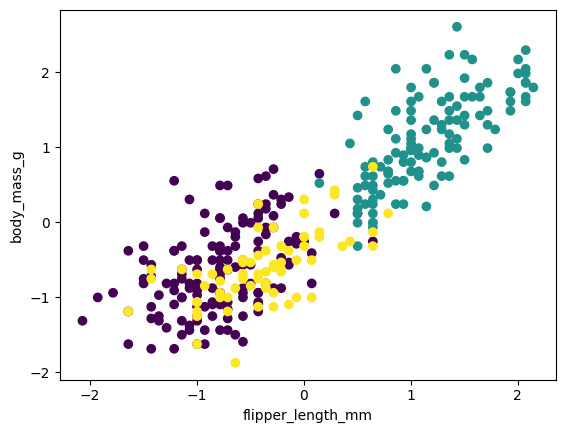

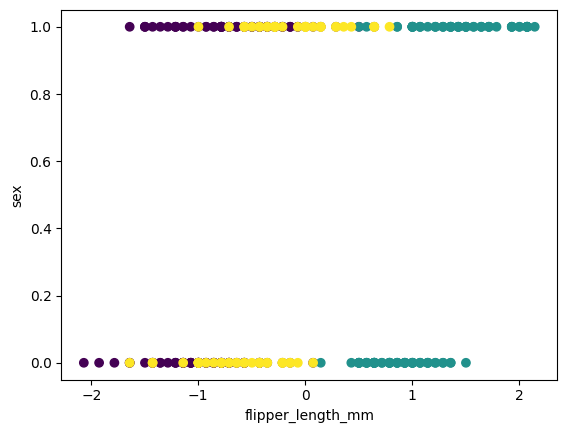

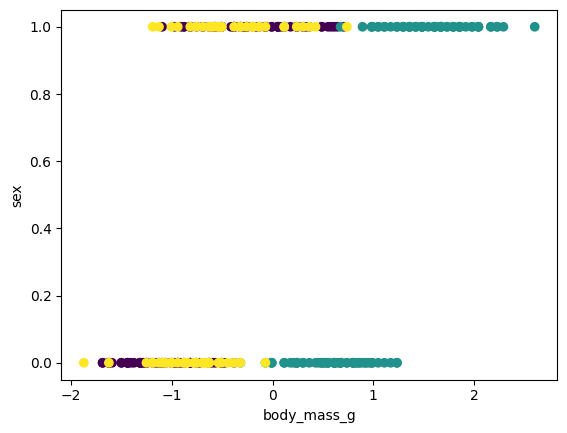

In [10]:
# TOP CORRELATED FEATURES
top_features = ["flipper_length_mm", "body_mass_g", "bill_length_mm"]
for i,cx in enumerate(top_features):
  for j,cy in enumerate(top_features):
    if j > i:
      plt.scatter(penguins_features_df[cx], penguins_features_df[cy], c=penguins_df["label"])
      plt.xlabel(cx)
      plt.ylabel(cy)
      plt.show()

# ALL FEATURES
for i,cx in enumerate(penguins_features_df.columns):
  for j,cy in enumerate(penguins_features_df.columns):
    if j > i:
      plt.scatter(penguins_features_df[cx], penguins_features_df[cy], c=penguins_df["label"])
      plt.xlabel(cx)
      plt.ylabel(cy)
      plt.show()

### PCA

The plots tell us a lot.

Some surprises...

We can try to simplify this data by performing `PCA` and combining some of the original features into _principal components_.

In [ ]:
# TODO: create PCA
penguins_pca = PCA(n_components=3)


# TODO: fit+transform
penguins_pca_df = penguins_pca.fit_transform(penguins_scaled_df)

# TODO: explained variance
# how much of original data is represented in 3 features
# have 95% of information from original data frame
penguins_pca.explained_variance()

np.float64(0.9560722122774412)

### Covariances Again

Can look at `PCA` covariance table.

In [ ]:
# TODO: PCA.cov()
penguins_pca_df.cov().round(3)
# features are independent from other ones, helps linear regression model 

,PC0,PC1,PC2
PC0,2.769,-0.000,-0.000
PC1,-0.000,0.895,0.000
PC2,-0.000,0.000,0.412


Hmmm... the covariances of the `PCA` data look strange...

But, that's actually what's expected.

`PCA` separates our data into new features that are combinations of the previous features, but that are themselves not related to each other.

### Plots

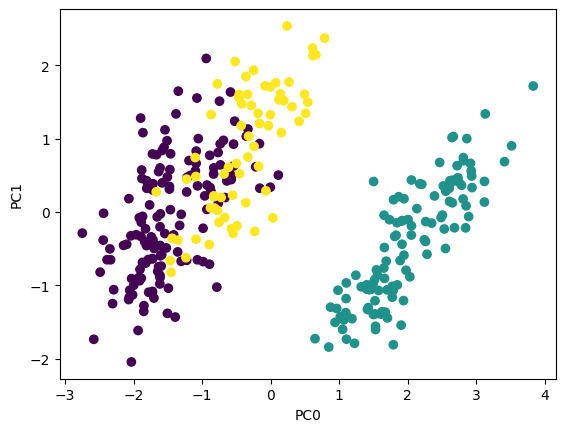

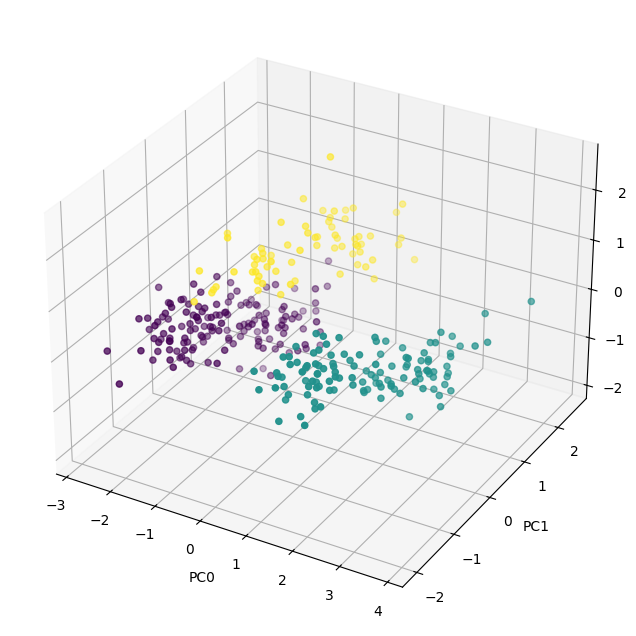

In [15]:
pca_column_names = penguins_pca_df.columns

# 2D
plt.scatter(penguins_pca_df[pca_column_names[0]], penguins_pca_df[pca_column_names[1]], c=penguins_df["label"])
plt.xlabel(pca_column_names[0])
plt.ylabel(pca_column_names[1])
plt.show()

# 3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

ax.scatter(penguins_pca_df[pca_column_names[0]],
           penguins_pca_df[pca_column_names[1]],
           penguins_pca_df[pca_column_names[2]],
           c=penguins_df["label"])
ax.set_xlabel(pca_column_names[0])
ax.set_ylabel(pca_column_names[1])
ax.set_zlabel(pca_column_names[2])
plt.show()